In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('D:/에어비앤비/파리/reviews.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794006 entries, 0 to 1794005
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 82.1+ MB


In [5]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('D:/에어비앤비/파리/reviews.csv')

# 데이터 확인
print(df.head())
print(df.info())


   listing_id         id        date  reviewer_id reviewer_name  \
0       39948    7450692  2013-09-20      8861358       Gilbert   
1       39948    7682958  2013-09-29      8947473         Susan   
2        3109  207127433  2017-10-28     51636494      Patricia   
3        3109  208779822  2017-11-03      4142888      Patricia   
4        3109  295840159  2018-07-24      7415343       Laurent   

                                            comments  
0  Aliyah et Philippe m'ont réservé un accueil ex...  
1  Aliyah and Philippe are gracious hosts and eve...  
2            Tout s'est bien déroulé. Merci bien. PG  
3  Un petit nid fouiller douillet situé dans  app...  
4  Appartement spacieux, propre,clair, et calme à...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794006 entries, 0 to 1794005
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    

In [6]:
# 결측값 확인
print(df.isnull().sum())

# 결측값 처리 (필요에 따라)
df = df.dropna()  # 결측값 있는 행 제거
# 또는
df['comments'] = df['comments'].fillna('')  # comments 컬럼의 결측값을 빈 문자열로 대체


listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         107
dtype: int64


In [7]:
# 날짜 형식 변환
df['date'] = pd.to_datetime(df['date'])


In [8]:
df = df.drop(columns=['listing_id', 'reviewer_id', 'reviewer_name'])


In [9]:
import re
from nltk.corpus import stopwords

# NLTK 불용어 사전 다운로드 (한 번만 실행하면 됨)
import nltk
nltk.download('stopwords')

# 불용어 설정
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    # 구두점 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 불용어 제거
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# 텍스트 전처리 적용
df['comments'] = df['comments'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
# 예: 감정 분석 수행
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# 감정 분석 결과 추가
df['sentiment'] = df['comments'].apply(get_sentiment)

# 감정 분포 확인
print(df['sentiment'].value_counts())


sentiment
positive    1181086
neutral      585180
negative      27632
Name: count, dtype: int64


In [11]:
!pip install textblob
import nltk
nltk.download('punkt')


     -------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evol0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

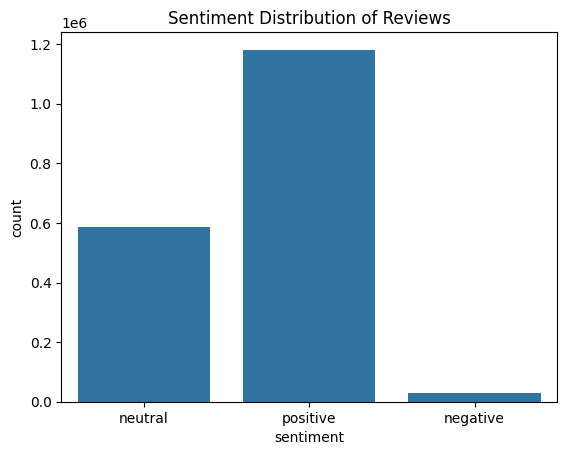

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 감정 분포 시각화
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution of Reviews')
plt.show()
